## Load CSVs

In [42]:
!pip3 install pandas
!pip3 install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [43]:
odds2022 = pd.read_csv('/Users/maxpollard/Desktop/Hermes/data/premOdds1yr.csv')
probs2022 = pd.read_csv('/Users/maxpollard/Desktop/Hermes/data/premData1yFTE.csv')
#odds2022
#probs2022

In [44]:

probs2022['hw_potential_win'] = (100*(odds2022['AvgH']-1))
probs2022['t_potential_win'] = (100*(odds2022['AvgD']-1))
probs2022['aw_potential_win'] = (100*(odds2022['AvgA']-1))

probs2022['hw_EV'] = (probs2022['hw_prob']*probs2022['hw_potential_win'])-((1-probs2022['hw_prob'])*100)

probs2022['aw_EV'] = (probs2022['aw_prob']*probs2022['aw_potential_win'])-((1-probs2022['aw_prob'])*100)

probs2022['t_EV'] = (probs2022['t_prob']*probs2022['t_potential_win'])-((1-probs2022['t_prob'])*100)

probs2022



,date,home,away,hw_prob,aw_prob,t_prob,h_score,a_score,result,Sum,hw_potential_win,t_potential_win,aw_potential_win,hw_EV,aw_EV,t_EV
0,8/5/22,Crystal Palace,Arsenal,0.3159,0.4205,0.2636,0,2,A,1.0000,339.0,259.0,88.0,38.6801,-20.9460,-5.3676
1,8/6/22,AFC Bournemouth,Aston Villa,0.2719,0.4687,0.2594,2,0,H,1.0000,280.0,250.0,104.0,3.3220,-4.3852,-9.2100
2,8/6/22,Everton,Chelsea,0.1763,0.6092,0.2145,0,1,A,1.0000,474.0,296.0,63.0,1.1962,-0.7004,-15.0580
3,8/6/22,Fulham,Liverpool,0.0926,0.7466,0.1607,2,2,D,0.9999,999.0,505.0,28.0,1.7674,-4.4352,-2.7765
4,8/6/22,Leeds United,Wolverhampton,0.3941,0.3456,0.2604,2,1,H,1.0001,134.0,234.0,218.0,-7.7806,9.9008,-13.0264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,11/12/22,Tottenham Hotspur,Leeds United,0.6551,0.1557,0.1892,4,3,H,1.0000,64.0,326.0,404.0,7.4364,-21.5272,-19.4008
142,11/12/22,West Ham United,Leicester City,0.4753,0.2665,0.2582,0,2,A,1.0000,109.0,251.0,260.0,-0.6623,-4.0600,-9.3718
143,11/12/22,Wolverhampton,Arsenal,0.1739,0.5939,0.2322,0,2,A,1.0000,515.0,326.0,55.0,6.9485,-7.9455,-1.0828
144,11/13/22,Brighton and Hove Albion,Aston Villa,0.5681,0.1975,0.2344,1,2,A,1.0000,86.0,271.0,321.0,5.6666,-16.8525,-13.0376


In [60]:
#probs2022['HW_Bet_Result']= probs2022['hw_EV'].apply(lambda x: x + 1000 if probs2022['hw_EV'].item > 0 else 0)

def label_bet (row):

    result = 0

    if row['hw_EV'] > 0:
        if row['result'] != 'H':
            result -= 100
        else:
            result += row['hw_potential_win']
    if row['aw_EV'] > 0:
        if row['result'] != 'A':
            result -= 100
        else:
            result += row['aw_potential_win']

    if row['t_EV'] > 0:
        if row['result'] != 'D':
            result -= 100
        else:
            result += row['t_potential_win']
    return result

probs2022['bet_result'] = probs2022.apply(lambda row: label_bet(row), axis=1)

probs2022['running_sum'] = probs2022['bet_result'].cumsum()

#probs2022['HW_ a Bet_Result'] = df.apply(lambda x: label_bet(x.hw_EV, x.col_2), axis=1)
probs2022.to_csv('results.csv', index=False)

probs2022


,date,home,away,hw_prob,aw_prob,t_prob,h_score,a_score,result,Sum,hw_potential_win,t_potential_win,aw_potential_win,hw_EV,aw_EV,t_EV,bet_result,running_sum
0,8/5/22,Crystal Palace,Arsenal,0.3159,0.4205,0.2636,0,2,A,1.0000,339.0,259.0,88.0,38.6801,-20.9460,-5.3676,-100.0,-100.0
1,8/6/22,AFC Bournemouth,Aston Villa,0.2719,0.4687,0.2594,2,0,H,1.0000,280.0,250.0,104.0,3.3220,-4.3852,-9.2100,280.0,180.0
2,8/6/22,Everton,Chelsea,0.1763,0.6092,0.2145,0,1,A,1.0000,474.0,296.0,63.0,1.1962,-0.7004,-15.0580,-100.0,80.0
3,8/6/22,Fulham,Liverpool,0.0926,0.7466,0.1607,2,2,D,0.9999,999.0,505.0,28.0,1.7674,-4.4352,-2.7765,-100.0,-20.0
4,8/6/22,Leeds United,Wolverhampton,0.3941,0.3456,0.2604,2,1,H,1.0001,134.0,234.0,218.0,-7.7806,9.9008,-13.0264,-100.0,-120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,11/12/22,Tottenham Hotspur,Leeds United,0.6551,0.1557,0.1892,4,3,H,1.0000,64.0,326.0,404.0,7.4364,-21.5272,-19.4008,64.0,-2771.0
142,11/12/22,West Ham United,Leicester City,0.4753,0.2665,0.2582,0,2,A,1.0000,109.0,251.0,260.0,-0.6623,-4.0600,-9.3718,0.0,-2771.0
143,11/12/22,Wolverhampton,Arsenal,0.1739,0.5939,0.2322,0,2,A,1.0000,515.0,326.0,55.0,6.9485,-7.9455,-1.0828,-100.0,-2871.0
144,11/13/22,Brighton and Hove Albion,Aston Villa,0.5681,0.1975,0.2344,1,2,A,1.0000,86.0,271.0,321.0,5.6666,-16.8525,-13.0376,-100.0,-2971.0


<AxesSubplot: >

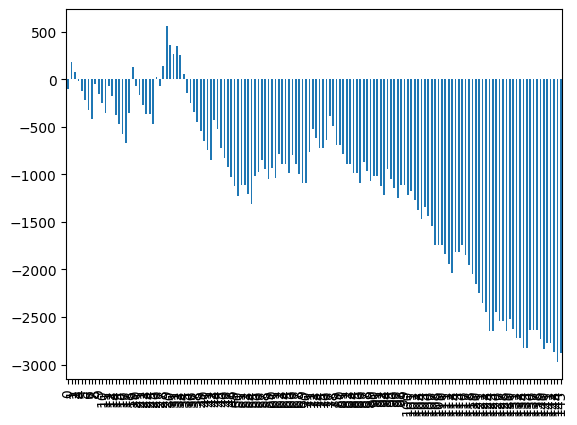

In [61]:

# !pip3 install pandas
#probs2022[['bet_result'].plot(kind = 'line', x = 'Duration', y = 'Calories')

probs2022['running_sum'].plot(kind = 'bar')



<AxesSubplot: >

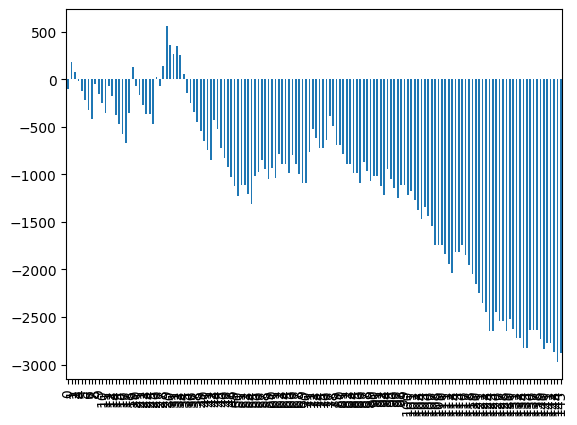

In [62]:
probs2022['running_sum'].plot(kind = 'bar')
